## Environment Data first tests
Duncan Cameron-Steinke

First published Aug 21, 2018


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
raw_data = pd.read_csv(r"C:\Users\Duncan C-S\Documents\Environmental Data Science Challenge\Raw_data\NFA 2018.csv")
raw_data.sample(5)

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
41700,"Korea, Republic of",KOR,Asia,Eastern Asia,1989,BiocapPerCap,0.236327,0.001280,0.110886,0.467260,0.071514,0.000000,8.872671e-01,7784.94,42547000
6493,Bermuda,BMU,North America,North America,1997,EFConsTotGHA,NaN,NaN,NaN,NaN,NaN,NaN,4.704776e+05,69624.40,63000
42212,Latvia,LVA,Europe,Northern Europe,2001,EFConsPerCap,0.705142,0.203862,1.710465,0.096190,0.024290,1.271955,4.011904e+00,7478.76,2345000
16545,Costa Rica,CRI,Latin America and the Caribbean,Central America,1969,EFExportsTotGHA,487423.064000,814576.353800,14132.743970,15079.345080,0.000000,130385.166900,1.461597e+06,3545.30,1798000
59240,Peru,PER,Latin America and the Caribbean,South America,2000,BiocapPerCap,0.284434,0.573776,3.385002,0.238824,0.052002,0.000000,4.534038e+00,3310.78,25915000


## Want to chose rational time frame

Plotting the total number of countries with data available for each given year


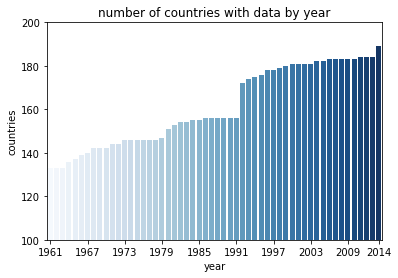

In [2]:
countries = raw_data['country'].unique()
years = raw_data['year'].unique()
years = np.sort(years)

barplot = pd.DataFrame(columns=["year","countries"])
for yr in years:
    temp = raw_data[raw_data.year == yr]
    N = len(temp.country.unique())
    year = pd.Timestamp(yr, 1, 1, 12)
    year = yr
    barplot = barplot.append(pd.DataFrame([[year, N]], columns=["year","countries"]), ignore_index=True)
    
sns.barplot(x='year', y='countries', data = barplot, palette = 'Blues')
plt.ylim(100,200)
plt.title("number of countries with data by year")
ticks = [0,6,12,18,24,30,36,42,48,53]
year_of_ticks = barplot.iloc[ticks]['year']
plt.xticks(ticks, year_of_ticks)
print("Plotting the total number of countries with data available for each given year")

### The above barplot shows that there are just over 130 countries that have data between the years of 1961 to 2014. There is a large increase in data collection occuring in 1992 when the number of countries with data goes from 155 to 175. 


## We can see now the years for which data is available, next we would like to examine the *quality of data* as a function of country and UN_subregion

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


The following plot indicates that there is a bimodal distribution in the quality of data per country


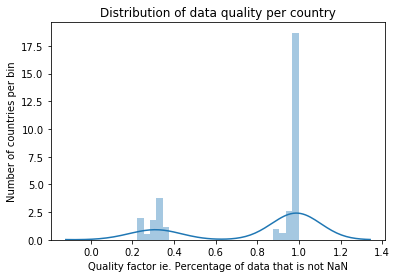

In [3]:
countryData = pd.DataFrame(columns=["country","UN_subregion", "quality", "years"])
for country in countries:
    temp = raw_data.loc[raw_data['country'] == country]
    counts = temp.count()
    Q_prct = counts[['crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon', 'total', 'Percapita GDP (2010 USD)',
       'population']].sum()/(counts['country']*9)
    years = len(temp["year"].unique())
    subreg = temp.iloc[0]['UN_subregion']
    countryData = countryData.append(pd.DataFrame([[country, subreg, Q_prct, years]], columns=["country", "UN_subregion", "quality", "years"]), ignore_index=True)

countryData["years"] = pd.to_numeric(countryData["years"])
sns.distplot(countryData['quality'], bins =25)
plt.xlabel("Quality factor ie. Percentage of data that is not NaN")
plt.ylabel("Number of countries per bin")
plt.title("Distribution of data quality per country")
print("The following plot indicates that there is a bimodal distribution in the quality of data per country")

### The above distribution curve shows that the data quality is extremly bi-modal. Either nearly all the data for a given country is available in which case the quality factor exceeds 80%. Or more then half the data for that country is missing and the quality factor is less then 50%.

# Want to examine the reason for the bi-modal distribution. Is it based on UN_subregion? number of years for which data is collected? or based on type of record collected?

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


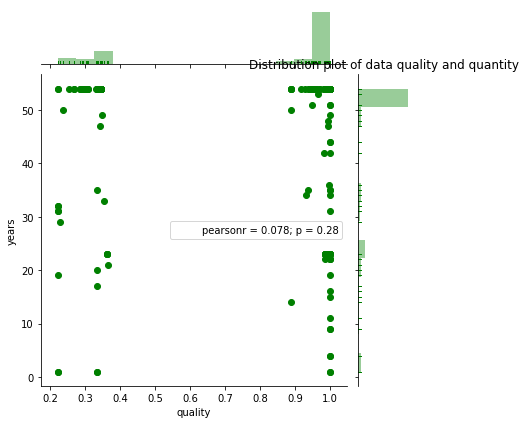

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


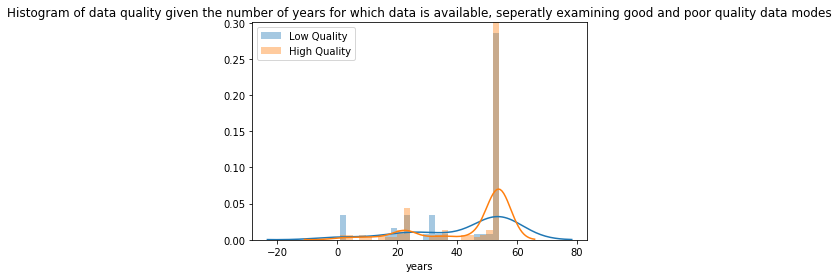

In [8]:
sns.jointplot("quality", 'years', data = countryData, kind="scatter", color="g" , marginal_kws=dict(bins=15, rug=True))
plt.title("Distribution plot of data quality and quantity")
plt.show()
lowQ_data = countryData[countryData.quality < 0.5]
highQ_data = countryData[countryData.quality >= 0.5]
sns.distplot(lowQ_data['years'], bins =25)
sns.distplot(highQ_data['years'], bins =25)
plt.legend(["Low Quality", "High Quality"])
plt.title("Histogram of data quality given the number of years for which data is available, seperatly examining good and poor quality data modes")
plt.show()

### The above plot shows that there does not exist a corelation between quality of data and number of years in which data is available. This can be seen from the the fact that both the high and low quality modes have similar l:
### * Having low quality data does not indicate you have less data available 
### * Having many years of available data does not indicate that the quality of data will be better